In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Week04/datasets/perovai_devices_day6_stability_ready.csv")
print("Rows:", len(df))
df.head()

Rows: 106


,Device,FF_Forward,FF_Reverse,Jsc_mAcm2_Forward,Jsc_mAcm2_Reverse,PCE_percent_Forward,PCE_percent_Reverse,Rs_ohm_cm2_Forward,Rs_ohm_cm2_Reverse,Rsh_ohm_cm2_Forward,...,Voc_V_Forward,Voc_V_Reverse,Delta_PCE,Delta_Voc,Delta_Jsc,Delta_FF,Hysteresis_Index,High_Hysteresis,Low_Rs,Unstable
0,device001,0.650051,0.640161,20.177047,20.178596,14.491762,14.377952,8.245944,8.304344,5106.928620,...,1.104883,1.113055,-0.113810,0.008172,0.001549,-0.009890,-0.007916,0,1,0
1,device002,0.746704,0.758766,20.051937,20.154208,17.134683,17.777031,6.118376,7.594258,3341.636255,...,1.144383,1.162480,0.642347,0.018098,0.102270,0.012062,0.036134,0,1,0
2,device003,0.771115,0.767192,20.756446,20.797109,18.363962,18.387340,4.786209,5.584745,4110.186343,...,1.147345,1.152423,0.023378,0.005078,0.040663,-0.003923,0.001271,0,1,0
3,device004,0.748184,0.759476,20.071712,20.171704,17.191299,17.810883,6.110401,7.581881,3240.772843,...,1.144763,1.162596,0.619584,0.017833,0.099991,0.011292,0.034787,0,1,0
4,device005,0.748388,0.755708,20.152430,20.259536,17.333143,17.911775,6.452673,8.205573,3485.020804,...,1.149273,1.169918,0.578632,0.020645,0.107106,0.007320,0.032305,0,1,0


In [3]:
features = [
    "Voc_V_Reverse",
    "Jsc_mAcm2_Reverse",
    "FF_Reverse",
    "Rs_ohm_cm2_Reverse",
    "Rsh_ohm_cm2_Reverse",
    "Delta_PCE",
    "Hysteresis_Index"
]

X = df[features]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
iso = IsolationForest(
    n_estimators=300,
    contamination=0.05,
    random_state=42
)

df["Anomaly_Score"] = iso.fit_predict(X_scaled)
df["Anomaly"] = (df["Anomaly_Score"] == -1).astype(int)

df["Anomaly"].value_counts()

Anomaly
0    100
1      6
Name: count, dtype: int64

In [6]:
df[df["Anomaly"] == 1][[
    "Device",
    "Voc_V_Reverse",
    "Jsc_mAcm2_Reverse",
    "FF_Reverse",
    "Rs_ohm_cm2_Reverse",
    "Rsh_ohm_cm2_Reverse",
    "Delta_PCE",
    "Hysteresis_Index"
]]

,Device,Voc_V_Reverse,Jsc_mAcm2_Reverse,FF_Reverse,Rs_ohm_cm2_Reverse,Rsh_ohm_cm2_Reverse,Delta_PCE,Hysteresis_Index
7,device008,1.219800,-0.000019,-0.606497,2.026717e+08,2.381029e+06,4.859762e-06,0.337591
24,device025,0.476894,0.000006,0.330804,7.367866e+07,2.880276e+07,6.498116e-07,0.671607
47,device048,1.219800,0.000004,1.131770,1.458819e+09,7.300051e+07,5.325505e-06,0.907055
74,device075,0.002418,2.447195,-8.842282,9.880061e-01,9.880061e-01,-5.232229e-02,1.000005
81,device082,1.170200,0.000003,0.645778,8.041407e+08,3.813167e+07,1.775198e-06,0.733888
86,device087,0.931900,4.260528,0.000001,8.914104e+07,2.071750e+00,8.556686e-03,1810.071312


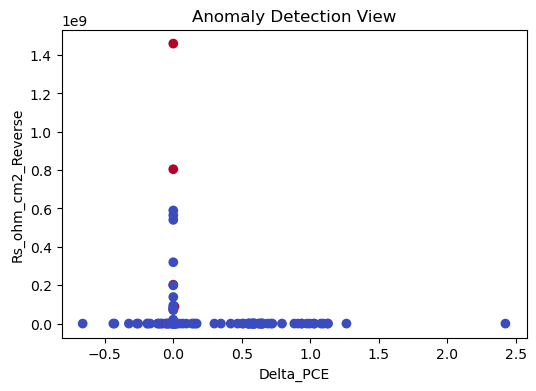

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(df["Delta_PCE"], df["Rs_ohm_cm2_Reverse"], c=df["Anomaly"], cmap="coolwarm")
plt.xlabel("Delta_PCE")
plt.ylabel("Rs_ohm_cm2_Reverse")
plt.title("Anomaly Detection View")
plt.show()

In [8]:
print("Negative PCE:", (df["PCE_percent_Reverse"] < 0).sum() if "PCE_percent_Reverse" in df else "N/A")
print("Zero Jsc:", (df["Jsc_mAcm2_Reverse"] == 0).sum())
print("Negative Rs:", (df["Rs_ohm_cm2_Reverse"] < 0).sum())

Negative PCE: 2
Zero Jsc: 0
Negative Rs: 0


In [9]:
df.to_csv("datasets/perovai_week05_day4_anomalies.csv", index=False)
print("Saved: datasets/perovai_week05_day4_anomalies.csv")

Saved: datasets/perovai_week05_day4_anomalies.csv
